# Data exploration for final report

## Importar librerías

In [11]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Fijar opciones

In [51]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")

## Importar datos

In [13]:
pr = pd.read_csv("PROYECTO/predial_pagos_1999_2020.csv")

C:\Users\sanal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,5,6,7,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
pr.head()

,ano_fac,numero,tip_fac,nudos,cons_modulo,fch_ingreso,sitio_pago,estado,cedula,nombre,codigo_catastral,proindiviso,periodo_liq,ult_pag,acu_pag,vlr_cptotro,ncv,usuario,vlr_fact
0,1999.00,48499.00,E,N,37666.00,2000-01-03 15:00:20,CFETAQ,P,21600339.00,OLGA MARIA BERMUDEZ DE PANIAGUA,nan,50.00,200004.00,199904.00,nan,nan,0.00,EGARCIA,53152.00
1,1999.00,59882.00,E,N,49049.00,2000-01-03 15:01:40,CFETAQ,P,890916510.00,HORACIO LONDONO Y CIA LTDA,nan,100.00,200004.00,199904.00,nan,nan,0.00,EGARCIA,296096.00
2,1999.00,55056.00,E,N,44223.00,2000-01-04 16:13:09,CFETAQ,P,21963580.00,MARIA ELENA OSPINA LARA,nan,100.00,200004.00,199904.00,nan,nan,0.00,AYEPES,25020.00
3,1999.00,56484.00,E,N,45651.00,2000-01-04 16:11:26,CFETAQ,P,70286080.00,LUIS ANIBAL ROJAS ALZATE,nan,100.00,200004.00,199904.00,nan,nan,0.00,AYEPES,55020.00
4,1999.00,56484.00,E,N,45651.00,2000-01-04 16:11:26,CFETAQ,P,70286080.00,LUIS ANIBAL ROJAS ALZATE,nan,50.00,200004.00,199904.00,nan,nan,0.00,AYEPES,55020.00


In [15]:
ica = pd.read_csv("PROYECTO/ica_pagos_2000_2020.csv", encoding = "ISO-8859-1", low_memory = False, index_col=0).reset_index()

In [16]:
ica.head()

,COD ESTABLECIMIENTO,NIT O CEDULA,NOMBRE Y/O RAZÓN SOCIAL,N° FACTURA,V/R FACTURA,FECHA INGRESO PAGO,ULTIMO PAGO,PERIODO LIQUIDADO,ESTADO FACTURA,year
0,2464,36271083,UNETE,200000110096,17250.00,2000-09-29 15:32:11,200008.00,200009,P,2000
1,2920,39438318,PUERTAS Y TRIPLEX PLAZA,200000111317,12464.00,2000-09-29 15:34:28,200008.00,200009,P,2000
2,1722,22052400,LEGUMBRERIA Y CARNICERIA LA 65,200000111197,34752.00,2000-09-29 15:37:36,200007.00,200009,P,2000
3,1978,39205526,PELUQUERIA BEAUTY,200000111182,11903.00,2000-09-29 15:38:10,200008.00,200009,P,2000
4,421,21600174,CAFETERIA Y PANADERIA SAN ANTONIO,200000111897,22483.00,2000-09-29 15:38:30,200008.00,200009,P,2000


## Exploración general

### Predial

In [17]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443754 entries, 0 to 1443753
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ano_fac           1443752 non-null  float64
 1   numero            994399 non-null   float64
 2   tip_fac           994399 non-null   object 
 3   nudos             994397 non-null   object 
 4   cons_modulo       994399 non-null   float64
 5   fch_ingreso       994399 non-null   object 
 6   sitio_pago        994399 non-null   object 
 7   estado            994399 non-null   object 
 8   cedula            1433237 non-null  float64
 9   nombre            1443751 non-null  object 
 10  codigo_catastral  1321744 non-null  float64
 11  proindiviso       1436296 non-null  float64
 12  periodo_liq       1351513 non-null  float64
 13  ult_pag           1443748 non-null  float64
 14  acu_pag           0 non-null        float64
 15  vlr_cptotro       1267124 non-null  float64
 16  

In [18]:
pr.shape

(1443754, 19)

In [19]:
pr.describe()

,ano_fac,numero,cons_modulo,cedula,codigo_catastral,proindiviso,periodo_liq,ult_pag,acu_pag,vlr_cptotro,ncv,vlr_fact
count,1443752.00,994399.00,994399.00,1433237.00,1321744.00,1436296.00,1351513.00,1443748.00,0.00,1267124.00,961395.00,1443754.00
mean,2011.55,139351.33,55068.55,5248138046.47,1219242606738392983313175982280540160.00,68.76,201090.76,201066.88,nan,6118.06,1.49,2671858.40
std,5.64,98409.29,60079.64,68549125982.89,3322067404587082292804464978398543872.00,33.73,3026.85,2936.99,nan,798749.55,4.04,34532073.91
min,1999.00,1.00,1.00,5.00,1000100010000199974912.00,0.00,0.00,0.00,nan,-291665981.00,0.00,0.00
25%,2007.00,54982.00,19323.00,15429108.00,1010102260001400029184.00,50.00,200704.00,200702.00,nan,0.00,0.00,54174.25
50%,2012.00,130732.00,34952.00,32470574.00,2000000060046049804288.00,92.52,201204.00,201203.00,nan,0.00,0.00,186040.00
75%,2016.00,213981.00,73161.00,43745335.00,2010000300006000033792.00,100.00,201603.00,201604.00,nan,0.00,1.00,687608.00
max,2020.00,433268.00,401857.00,965346851130.00,30099999999999999756849473284273602560.00,125.00,202104.00,202104.00,nan,642347394.00,96.00,23425021933.00


In [20]:
pr.groupby('ano_fac').size()

ano_fac
1999.00       254
2000.00     34879
2001.00     40479
2002.00     35857
2003.00     39773
2004.00     48422
2005.00     56077
2006.00     66272
2007.00     69927
2008.00     67653
2009.00     66395
2010.00     70115
2011.00     66354
2012.00     78170
2013.00     79775
2014.00     86214
2015.00     87783
2016.00    109347
2017.00     94470
2018.00     82446
2019.00     81341
2020.00     81749
dtype: int64

In [21]:
casos = pr.groupby(['ano_fac', 'cedula', 'periodo_liq', 'ult_pag', 'codigo_catastral', 'vlr_fact']).size().reset_index().rename(columns = {0:"count"})
casos = casos.sort_values('count', ascending=False)
casos = casos[casos['count'] > 1]
casos

,ano_fac,cedula,periodo_liq,ult_pag,codigo_catastral,vlr_fact,count
866771,2016.00,830054539.00,201602.00,201602.00,10099999999999999498732536162620014592.00,23474115.00,677
499183,2011.00,900152062.00,201101.00,201004.00,1010102260003799957504.00,71196558.00,230
1049037,2020.00,830053036.00,202002.00,202002.00,1010000000000000000000.00,5129628.00,222
867830,2016.00,890939936.00,201604.00,201603.00,10099999999999999498732536162620014592.00,17916857.00,186
1050193,2020.00,860034313.00,202004.00,202004.00,10099999999999999498732536162620014592.00,241776332.00,186
...,...,...,...,...,...,...,...
1000805,2019.00,15428663.00,202004.00,201904.00,2010000000000000000000.00,117132.00,2
511514,2012.00,8294716.00,201204.00,201204.00,2010000260007000014848.00,66928.00,2
1001971,2019.00,15432439.00,202004.00,201804.00,1010000000000000000000.00,7281685.00,2
1005365,2019.00,21304782.00,202004.00,201904.00,2020000000000000000000.00,10344588.00,2


### Missing data

In [22]:
pr.isnull().sum()

ano_fac                   2
numero               449355
tip_fac              449355
nudos                449357
cons_modulo          449355
fch_ingreso          449355
sitio_pago           449355
estado               449355
cedula                10517
nombre                    3
codigo_catastral     122010
proindiviso            7458
periodo_liq           92241
ult_pag                   6
acu_pag             1443754
vlr_cptotro          176630
ncv                  482359
usuario              449355
vlr_fact                  0
dtype: int64

### ICA

In [23]:
ica.head()

,COD ESTABLECIMIENTO,NIT O CEDULA,NOMBRE Y/O RAZÓN SOCIAL,N° FACTURA,V/R FACTURA,FECHA INGRESO PAGO,ULTIMO PAGO,PERIODO LIQUIDADO,ESTADO FACTURA,year
0,2464,36271083,UNETE,200000110096,17250.00,2000-09-29 15:32:11,200008.00,200009,P,2000
1,2920,39438318,PUERTAS Y TRIPLEX PLAZA,200000111317,12464.00,2000-09-29 15:34:28,200008.00,200009,P,2000
2,1722,22052400,LEGUMBRERIA Y CARNICERIA LA 65,200000111197,34752.00,2000-09-29 15:37:36,200007.00,200009,P,2000
3,1978,39205526,PELUQUERIA BEAUTY,200000111182,11903.00,2000-09-29 15:38:10,200008.00,200009,P,2000
4,421,21600174,CAFETERIA Y PANADERIA SAN ANTONIO,200000111897,22483.00,2000-09-29 15:38:30,200008.00,200009,P,2000


In [24]:
ica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515135 entries, 0 to 515134
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   COD ESTABLECIMIENTO      515135 non-null  int64  
 1   NIT O CEDULA             515135 non-null  object 
 2   NOMBRE Y/O RAZÓN SOCIAL  515135 non-null  object 
 3   N° FACTURA               515135 non-null  int64  
 4   V/R FACTURA              515135 non-null  float64
 5   FECHA INGRESO PAGO       515135 non-null  object 
 6   ULTIMO PAGO              515132 non-null  float64
 7   PERIODO LIQUIDADO        515135 non-null  int64  
 8   ESTADO FACTURA           515135 non-null  object 
 9   year                     515135 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.3+ MB


In [25]:
ica.shape

(515135, 10)

In [26]:
ica.describe()

,COD ESTABLECIMIENTO,N° FACTURA,V/R FACTURA,ULTIMO PAGO,PERIODO LIQUIDADO,year
count,515135.00,515135.00,515135.00,515132.00,515135.00,515135.00
mean,6141.71,145126649606.70,993568.16,201132.39,201148.21,2011.43
std,6025.03,85010223683.94,16214118.11,590.25,592.51,5.92
min,1.00,2004001.00,0.00,199204.00,199805.00,2000.00
25%,1754.00,20130084805.50,22742.00,200610.00,200611.00,2006.00
50%,4169.00,200800167937.00,45000.00,201203.00,201206.00,2012.00
75%,8731.00,201600245697.50,172822.00,201702.00,201704.00,2017.00
max,34122.00,202000843523.00,4315214703.00,202801.00,202012.00,2020.00


In [27]:
ica.groupby('year').size()

year
2000     6037
2001    18972
2002    19777
2003    19656
2004    21360
2005    22152
2006    22889
2007    23258
2008    22965
2009    23364
2010    22969
2011    23857
2012    24278
2013    24888
2014    26956
2015    29041
2016    24333
2017    31204
2018    33190
2019    36466
2020    37523
dtype: int64

In [28]:
casos_ica = ica.groupby(['N° FACTURA', 'year']).size().reset_index().rename(columns = {0:"count"})
casos_ica = casos_ica.sort_values('count', ascending=False)
#casos_ica = casos_ica[casos_ica['count'] > 1]
casos_ica

,N° FACTURA,year,count
0,2004001,2004,1
343419,201400236640,2014,1
343432,201400236679,2014,1
343431,201400236677,2014,1
343430,201400236675,2014,1
...,...,...,...
171706,200100131334,2001,1
171705,200100131333,2001,1
171704,200100131332,2001,1
171703,200100131331,2001,1


In [19]:
#ica[(ica['nit_cedula']==890900608) & (ica['year'] == 2017) & (ica['tarifa'] == 8)]

KeyError: 'nit_cedula'

### Missing data

In [29]:
ica.isnull().sum()

COD ESTABLECIMIENTO        0
NIT O CEDULA               0
NOMBRE Y/O RAZÓN SOCIAL    0
N° FACTURA                 0
V/R FACTURA                0
FECHA INGRESO PAGO         0
ULTIMO PAGO                3
PERIODO LIQUIDADO          0
ESTADO FACTURA             0
year                       0
dtype: int64

## EDA

### Predial

Total predial payments per year:

In [61]:
pd.options.display.max_rows = 999

pr_payments = pr[['periodo_liq', 'vlr_fact']].groupby(['periodo_liq']).sum(['vlr_fact']).reset_index()
pr_payments = pr_payments[pr_payments['periodo_liq'] > 200004]

pr_payments['periodo_liq'] = pr_payments['periodo_liq'].astype('int').astype('str')
pr_payments['pago'] = pr_payments['vlr_fact']/1000000

pr_payments

,periodo_liq,vlr_fact,pago
38,200101,1258248040.00,1258.25
39,200102,8866522461.00,8866.52
40,200103,1634200301.00,1634.20
41,200104,13756897012.00,13756.90
42,200201,772311221.00,772.31
43,200202,2361619069.00,2361.62
44,200203,5566399475.00,5566.40
45,200204,14534447651.00,14534.45
46,200301,4273169326.00,4273.17
47,200302,4297435056.00,4297.44


In [62]:
pd.options.display.max_rows = 10

<AxesSubplot:xlabel='Current Payment Date', ylabel='Payment Amount (in millions of pesos)'>

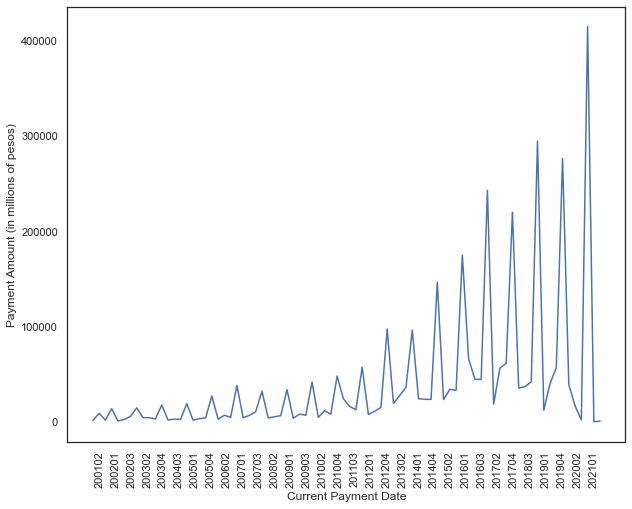

In [63]:
g = sns.lineplot(data=pr_payments, x="periodo_liq", y="pago")
g.set(xlabel='Current Payment Date', ylabel='Payment Amount (in millions of pesos)')
plt.pyplot.setp(g.get_xticklabels(), rotation=90)
g.xaxis.set_major_locator(ticker.LinearLocator(36))
g

### Predial

Median payment for predial

In [33]:
pr_payments = pr[['ano_fac', 'vlr_fact']].groupby(['ano_fac']).median(['vlr_fact']).reset_index()
pr_payments = pr_payments[pr_payments['ano_fac'] > 2000]

pr_payments['ano_fac'] = pr_payments['ano_fac'].astype('int').astype('str')
pr_payments['pago'] = pr_payments['vlr_fact']/1000000

pr_payments

,ano_fac,vlr_fact,pago
2,2001,90165.00,0.09
3,2002,109104.00,0.11
4,2003,131608.00,0.13
5,2004,117493.00,0.12
6,2005,94843.00,0.09
7,2006,98685.00,0.10
8,2007,102684.00,0.10
9,2008,88712.00,0.09
10,2009,165172.00,0.17
11,2010,169314.00,0.17


<AxesSubplot:xlabel='Current Payment Date', ylabel='Median Payment'>

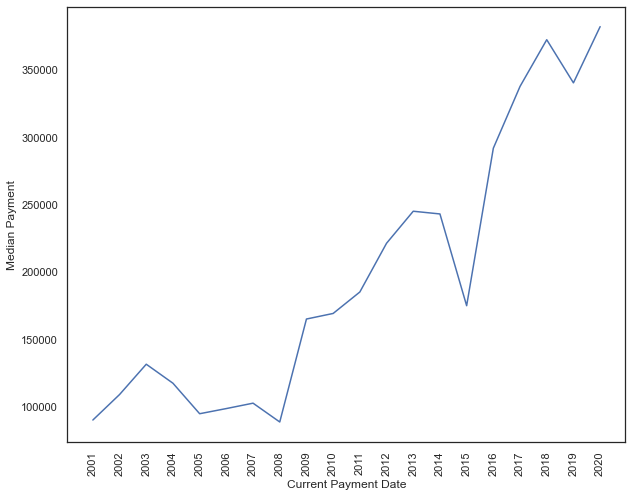

In [34]:
g = sns.lineplot(data=pr_payments, x="ano_fac", y="vlr_fact")
g.set(xlabel='Current Payment Date', ylabel='Median Payment')
plt.pyplot.setp(g.get_xticklabels(), rotation=90)
#g.xaxis.set_major_locator(ticker.LinearLocator(36))
g

In [58]:
pr_payments = pr[['periodo_liq', 'vlr_fact']].groupby(['periodo_liq']).median(['vlr_fact']).reset_index()
pr_payments = pr_payments[pr_payments['periodo_liq'] > 200004]

pr_payments['periodo_liq'] = pr_payments['periodo_liq'].astype('int').astype('str')
pr_payments['pago'] = pr_payments['vlr_fact']/1000000

pr_payments

,periodo_liq,vlr_fact,pago
38,200101,99103.00,0.10
39,200102,88406.00,0.09
40,200103,117166.00,0.12
41,200104,95280.00,0.10
42,200201,101510.00,0.10
43,200202,91060.00,0.09
44,200203,93634.00,0.09
45,200204,90900.00,0.09
46,200301,150882.00,0.15
47,200302,127861.00,0.13


<AxesSubplot:xlabel='Current Payment Date', ylabel='Median Payment'>

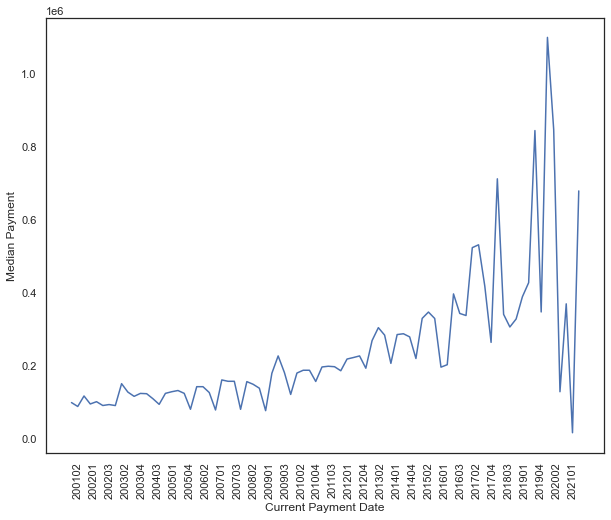

In [60]:
g = sns.lineplot(data=pr_payments, x="periodo_liq", y="vlr_fact")
g.set(xlabel='Current Payment Date', ylabel='Median Payment')
plt.pyplot.setp(g.get_xticklabels(), rotation=90)
g.xaxis.set_major_locator(ticker.LinearLocator(36))
g

In [39]:
pr_summary = pr[['ano_fac', 'vlr_fact']].groupby(['ano_fac']).describe().reset_index()
pr_summary['ano_fac'] = pr_summary['ano_fac'].astype('int').astype('str')
pr_summary

ano_fac  vlr_fact                                                     \
               count       mean         std     min       25%       50%   
0     1999    254.00   84418.26   176176.79 1654.00  21560.00  44269.00   
1     2000  34879.00  674796.28  3524832.92   34.00  27177.00  83972.00   
2     2001  40479.00  676787.24  4765316.63  168.00  34254.00  90165.00   
3     2002  35857.00  659943.38  3220337.54   90.00  40732.00 109104.00   
4     2003  39773.00  828737.91  3824554.54    0.00  48324.00 131608.00   
5     2004  48422.00  628187.04  3118606.24    0.00  43796.25 117493.00   
6     2005  56077.00  675775.45  3926490.01    0.00  27516.00  94843.00   
7     2006  66272.00  706659.56  3236641.30    0.00  27001.50  98685.00   
8     2007  69927.00  898462.30  6203877.74    0.00  27020.50 102684.00   
9     2008  67653.00  789931.18  4291061.11    0.00  21199.00  88712.00   
10    2009  66395.00  981723.67  4998703.94    0.00  58064.00 165172.00   
11    2010  70115.00 1153322.98  6757022.05    0.00  51838.50 169314.00   
12    2011  66354.00 1799813.47  9413303.95    0.00  61205.00 185252.00   
13    2012  78170.00 1847358.99 10365919.43    0.00  74030.00 221436.00   
14    2013  79775.00 2541139.33 17010315.09    0.00  70620.00 245220.00   
15    2014  86214.00 2576710.04 17659361.11    0.00  71039.00 243207.00   
16    2015  87783.00 2358238.00 15776922.08    0.00  41420.50 175063.00   
17    2016 109347.00 2811289.81 13739840.18    0.00  85478.00 292034.00   
18    2017  94470.00 4668648.36 32579164.36    0.00  85092.00 337924.00   
19    2018  82446.00 5517592.33 31584108.52    0.00 101164.00 372600.00   
20    2019  81341.00 7249277.15 42880671.65    0.00  93088.00 340552.00   
21    2020  81749.00 7790721.68 44978089.31    0.00 100468.00 382308.00   

                             
          75%           max  
0    80490.75    2395081.00  
1   302955.00   75566552.00  
2   290509.00  132454488.00  
3   335631.00  143559312.00  
4   393452.00  148583888.00  
5   347876.00  153716372.00  
6   314010.00  194061226.00  
7   347589.50  140896764.00  
8   367091.00  572383913.00  
9   343817.00  442486270.00  
10  518532.00  168269904.00  
11  536480.00  347647235.00  
12  611306.00  191115929.00  
13  772186.00  642347394.00  
14  886914.00  552595884.00  
15  896156.00  696812634.00  
16  690635.00 1037544301.00  
17 1081299.00  646941420.00  
18 1177995.00 1913468930.00  
19 1366266.25  602808929.00  
20 1299889.00 3102337043.00  
21 1449840.00 1303886732.00

### ICA

Total ica payments per year:

In [53]:
ica_payments = ica[['V/R FACTURA', 'PERIODO LIQUIDADO']].groupby(['PERIODO LIQUIDADO']).sum(['V/R FACTURA']).reset_index()
ica_payments = ica_payments[ica_payments['PERIODO LIQUIDADO'] > 200012]
ica_payments['PERIODO LIQUIDADO'] = ica_payments['PERIODO LIQUIDADO'].astype('str')
ica_payments['pago'] = ica_payments['V/R FACTURA']/1000000
pd.options.display.max_rows = 999
ica_payments

,PERIODO LIQUIDADO,V/R FACTURA,pago
23,200101,384632850.00,384.63
24,200102,364674578.00,364.67
25,200103,375452551.00,375.45
26,200104,515110270.00,515.11
27,200105,419731537.00,419.73
28,200106,376653888.00,376.65
29,200107,384643777.00,384.64
30,200108,370713725.00,370.71
31,200109,377590104.00,377.59
32,200110,406535247.00,406.54


In [54]:
pd.options.display.max_rows = 10

<AxesSubplot:xlabel='Current Payment Date', ylabel='Payment Amount (in millions of pesos)'>

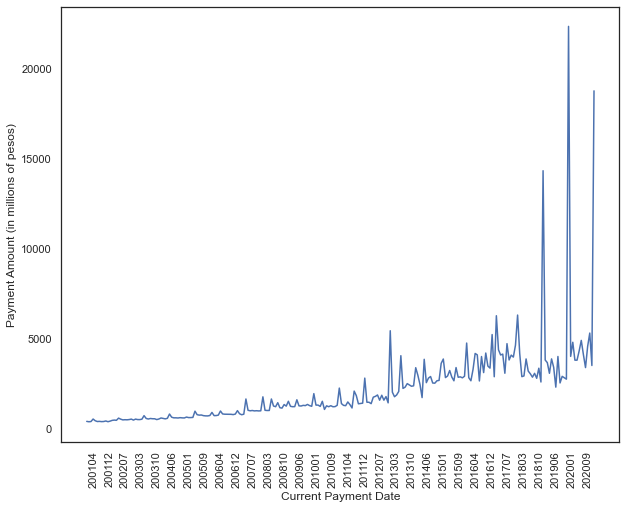

In [41]:
g = sns.lineplot(data=ica_payments, x="PERIODO LIQUIDADO", y="pago")
g.set(xlabel='Current Payment Date', ylabel='Payment Amount (in millions of pesos)')
plt.pyplot.setp(g.get_xticklabels(), rotation=90)
g.xaxis.set_major_locator(ticker.LinearLocator(36))
g

In [42]:
ica_payments = ica[['V/R FACTURA', 'year']].groupby(['year']).median(['V/R FACTURA']).reset_index()
ica_payments = ica_payments[ica_payments['year'] > 2000]
ica_payments['year'] = ica_payments['year'].astype('str')
ica_payments['pago'] = ica_payments['V/R FACTURA']/1000000
ica_payments

,year,V/R FACTURA,pago
1,2001,28000.00,0.03
2,2002,30001.00,0.03
3,2003,33000.00,0.03
4,2004,34000.00,0.03
5,2005,36666.50,0.04
6,2006,40000.00,0.04
7,2007,45000.00,0.04
8,2008,50582.00,0.05
9,2009,46523.00,0.05
10,2010,45478.00,0.05


<AxesSubplot:xlabel='Current Payment Date', ylabel='Median Payment Amount'>

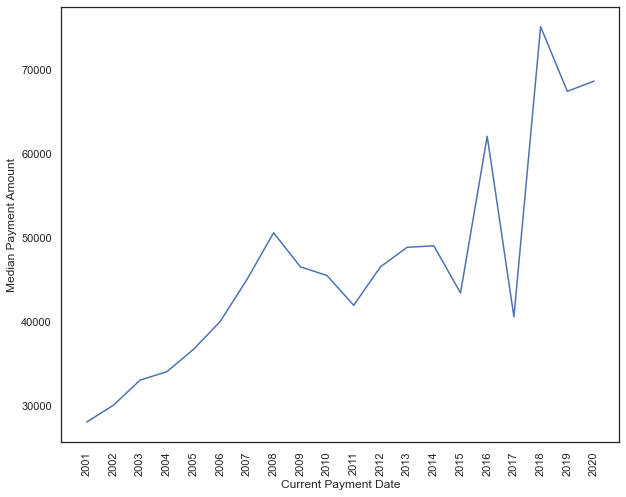

In [43]:
g = sns.lineplot(data=ica_payments, x="year", y="V/R FACTURA")
g.set(xlabel='Current Payment Date', ylabel='Median Payment Amount')
plt.pyplot.setp(g.get_xticklabels(), rotation=90)
#g.xaxis.set_major_locator(ticker.LinearLocator(12))
g

In [57]:
pd.options.display.max_rows = 999
ica_payments = ica[['V/R FACTURA', 'PERIODO LIQUIDADO']].groupby(['PERIODO LIQUIDADO']).median(['V/R FACTURA']).reset_index()
ica_payments = ica_payments[ica_payments['PERIODO LIQUIDADO'] > 200012]
ica_payments['PERIODO LIQUIDADO'] = ica_payments['PERIODO LIQUIDADO'].astype('str')
ica_payments['pago'] = ica_payments['V/R FACTURA']/1000000
ica_payments


,PERIODO LIQUIDADO,V/R FACTURA,pago
23,200101,28635.00,0.03
24,200102,25070.00,0.03
25,200103,28750.00,0.03
26,200104,30000.00,0.03
27,200105,28000.00,0.03
28,200106,28000.00,0.03
29,200107,28423.00,0.03
30,200108,26000.00,0.03
31,200109,26000.00,0.03
32,200110,30000.00,0.03


<AxesSubplot:xlabel='Current Payment Date', ylabel='Median Payment Amount'>

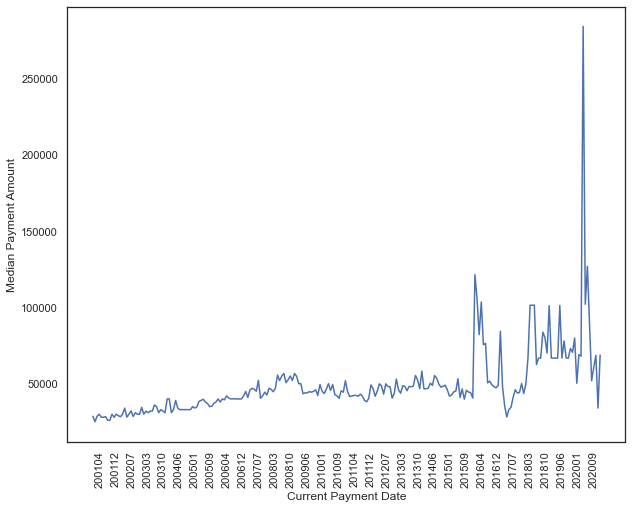

In [56]:
g = sns.lineplot(data=ica_payments, x="PERIODO LIQUIDADO", y="V/R FACTURA")
g.set(xlabel='Current Payment Date', ylabel='Median Payment Amount')
plt.pyplot.setp(g.get_xticklabels(), rotation=90)
g.xaxis.set_major_locator(ticker.LinearLocator(36))
g

In [99]:
ica_summary = ica[['year', 'V/R FACTURA']].groupby(['year']).describe()
ica_summary

V/R FACTURA                                                             \
           count       mean         std     min      25%      50%       75%   
year                                                                          
2000     6037.00  240298.54  2642924.24 4600.00 15870.00 26450.00  57500.00   
2001    18972.00  244520.72  2599579.11    0.00 17000.00 28000.00  60907.00   
2002    19777.00  294636.69  2939219.06    0.00 19000.00 30001.00  69001.00   
2003    19656.00  324632.77  3318317.11 3000.00 20026.50 33000.00  76787.00   
2004    21360.00  340072.74  3418935.21    0.00 21352.00 34000.00  80000.00   
2005    22152.00  387619.48  3905327.41    0.00 24001.00 36666.50  86000.00   
2006    22889.00  416847.11  4110476.97    0.00 25000.00 40000.00  95000.00   
2007    23258.00  538960.52  7114756.34    0.00 27000.00 45000.00 117171.50   
2008    22965.00  639235.13  7869373.18    0.00 30000.00 50582.00 141580.00   
2009    23364.00  688438.18  7706012.10    0.00 25000.00 46523.00 150000.00   
2010    22969.00  695952.45  7269103.41    0.00 23000.00 45478.00 148781.00   
2011    23857.00  761920.22  9437500.20    0.00 20594.00 41927.00 150233.00   
2012    24278.00  906983.44 16232503.55    0.00 20189.25 46511.00 196291.50   
2013    24888.00 1147472.60 17791589.64    0.00 19167.00 48846.00 232882.25   
2014    26956.00 1200726.60 16255575.71    0.00 17825.00 49028.00 243536.50   
2015    29041.00 1315146.58 16928449.28    0.00 14414.00 43400.00 254967.00   
2016    24333.00 1859819.55 19983392.82    0.00 15819.00 62100.00 393751.00   
2017    31204.00 1659248.15 21584158.44    0.00 10482.50 40551.00 297159.00   
2018    33190.00 1481819.72 19133745.59    0.00 33000.00 75182.50 352164.00   
2019    36466.00 1579462.08 29828838.54    0.00 33000.00 67467.00 334345.00   
2020    37523.00 1751553.43 27245221.55    0.00 34000.00 68674.00 347820.00   

                    
               max  
year                
2000   76689741.00  
2001  101300001.00  
2002   77000001.00  
2003  126729000.00  
2004  106900000.00  
2005  179823083.00  
2006  141730001.00  
2007  576293000.00  
2008  453348000.00  
2009  283587000.00  
2010  279565095.00  
2011  871596359.00  
2012 2246487000.00  
2013 2053627432.00  
2014 1212638855.00  
2015 1266970941.00  
2016 1334930470.00  
2017 1928151912.00  
2018 1687145480.00  
2019 3933769030.00  
2020 4315214703.00